In [1]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
import scipy.io as sio
mat = sio.loadmat('Pat1Train_1_1.mat',squeeze_me=True)
import matplotlib.pyplot as plt

C:\Users\louis\OneDrive\Desktop\seer-py-master\Examples


In [2]:
mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Oct  8 09:39:49 2018',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[ 19.369873 ,  -1.5776367, -41.794434 , ...,  62.809326 ,
          46.628662 , -18.094238 ],
        [ 23.331055 ,  -4.599121 , -36.759033 , ...,  70.79883  ,
          48.575684 , -17.087158 ],
        [ 25.345215 , -10.574463 , -34.744873 , ...,  84.831055 ,
          52.604004 , -17.087158 ],
        ...,
        [-15.610107 , -36.624756 ,  21.182617 , ..., -25.07666  ,
         -11.312988 ,  30.85083  ],
        [-24.60669  , -28.63501  ,  19.168457 , ..., -28.0979   ,
         -12.320068 ,  31.790771 ],
        [-34.610596 , -26.62085  ,  19.168457 , ..., -31.119385 ,
         -10.305908 ,  28.83667  ]], dtype=float32)}

In [3]:
sio.whosmat('Pat1Train_1_1.mat')

[('data', (240000, 16), 'single')]

In [4]:
mdata=mat['data']

In [5]:
mdata

array([[ 19.369873 ,  -1.5776367, -41.794434 , ...,  62.809326 ,
         46.628662 , -18.094238 ],
       [ 23.331055 ,  -4.599121 , -36.759033 , ...,  70.79883  ,
         48.575684 , -17.087158 ],
       [ 25.345215 , -10.574463 , -34.744873 , ...,  84.831055 ,
         52.604004 , -17.087158 ],
       ...,
       [-15.610107 , -36.624756 ,  21.182617 , ..., -25.07666  ,
        -11.312988 ,  30.85083  ],
       [-24.60669  , -28.63501  ,  19.168457 , ..., -28.0979   ,
        -12.320068 ,  31.790771 ],
       [-34.610596 , -26.62085  ,  19.168457 , ..., -31.119385 ,
        -10.305908 ,  28.83667  ]], dtype=float32)

In [6]:
length=24000
one1=np.transpose(mdata[0:length])[5]

In [7]:
ffts=np.fft.rfft(one1)
angles=((np.angle(ffts)/(3.14159))+1)/2
abss=np.abs(ffts)

In [8]:
len(angles)

12001

ValueError: Format 'jpg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

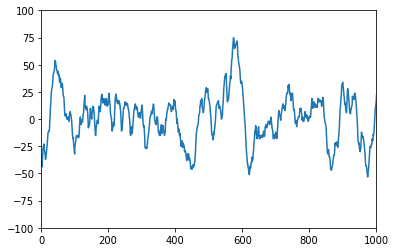

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(one1)
plt.axis([1, 1000, -100, 100])
plt.savefig("fig0.jpg")
plt.show()
plt.axis([1, 1000, 0, 1])
plt.plot(np.arange(1+length/2),angles)
plt.savefig("fig1.jpg")
plt.show()
plt.plot(np.arange(1+length/2),abss)
plt.axis([1, 10000, 0, 100000])
plt.xscale('log')
plt.savefig("fig2.jpg")
plt.show()


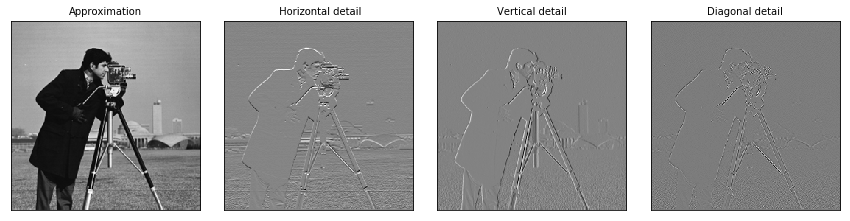

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [11]:
one1

array([-39.041748, -39.041748, -44.07715 , ..., -16.080078, -17.087158,
       -15.072998], dtype=float32)

In [12]:
cA, cD = pywt.dwt(one1, 'db1')

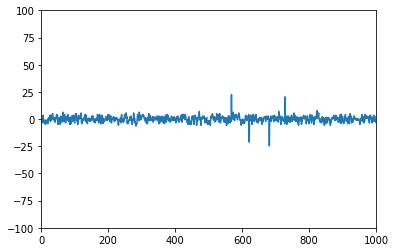

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(cD)
plt.axis([1, 1000, -100, 100])
plt.show()

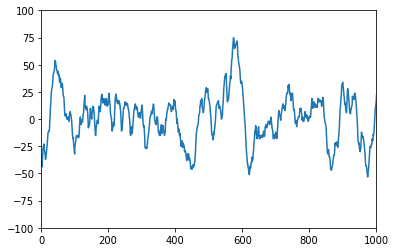

In [14]:
plt.plot(one1)
plt.axis([1, 1000, -100, 100])
plt.show()

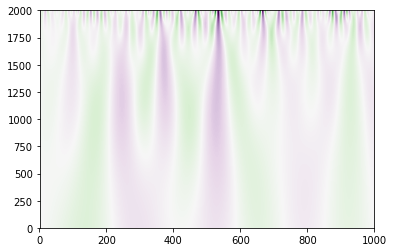

In [18]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = one1
widths = np.arange(100, 2000)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[1, 1000, 1, 2000], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.savefig("scalogram.png")
plt.show()